In [1]:
pwd()

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/RP/Summer21

/content/drive/MyDrive/RP/Summer21


In [8]:
cd Fundus-GAN-version-1/

/content/drive/My Drive/RP/Summer21/Fundus-GAN-version-1



**1. Segmentation**


In [5]:
device = 'cuda'

In [9]:
from torch.utils.data import DataLoader
import torch
from src.utils.config import *
from src.models.unet import *
from src.models.pix2pix_gen import UNet_pix2pix
from src.dataset.dataset import *
from src.models.discriminator import Discriminator
from train_pix2pix import *
from train import *
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [10]:
train_input_path = datapath_cfg['train_input_path']
train_label_path = datapath_cfg['train_label_path']
batch_size = cfg['batch_size']
print(train_input_path)

/content/drive/MyDrive/RP/Summer21/dataset/newi.tiff


In [11]:
train_dataset = unet_dataset(train_input_path, train_label_path)

In [12]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [13]:
unet = UNet(input_channels=cfg['input_dim'], output_channels=cfg['output_dim']).to(device)

In [14]:
unet_opt = torch.optim.Adam(unet.parameters(), lr=cfg['lr'])

In [15]:
unet = UNet(input_channels=cfg['input_dim'], output_channels=cfg['output_dim'])
checkpoint = torch.load('/content/drive/MyDrive/RP/F21/Models/UNET/unet_v_26-09-202114:30:12.pth')
unet.load_state_dict(checkpoint['unet'])
unet.to(device)

UNet(
  (upfeature): FeatureMapBlock(
    (conv): Conv2d(1, 32, kernel_size=(1, 1), stride=(1, 1))
  )
  (contract1): ContractingBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (activation): ReLU()
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (contract2): ContractingBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (activation): ReLU()
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (contract3): ContractingBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (activation): ReLU()
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padd

Epoch 0: Step 5: U-Net loss: 0.05962532386183739


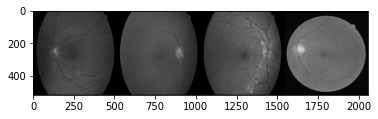

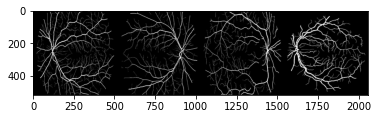

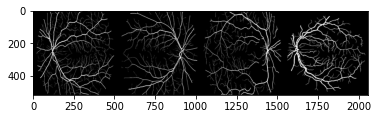

In [ ]:
train(model=unet, optimizer=unet_opt, 
      criterion=cfg['criterion'],
      train_dataloader=train_dataloader, 
      input_dim=cfg['input_dim'], 
      label_dim=cfg['output_dim'], 
      target_shape=cfg['target_shape'],
      device=device, save_dir = "/content/drive/MyDrive/RP/F21/Models/UNET")




**2. Image generation**




In [ ]:
pix2pix_dataset = pix2pix_dataset('/content/drive/MyDrive/RP/Summer21/dataset/maps')

In [ ]:
dataloader = DataLoader(pix2pix_dataset, batch_size=pix2pix_config['batch_size'], shuffle=True)

In [ ]:
unet_pix2pix = UNet_pix2pix(input_channels=pix2pix_config['input_dim'],output_channels=pix2pix_config['real_dim']).to(device)

In [ ]:
unet_opt = torch.optim.Adam(unet_pix2pix.parameters(), lr=pix2pix_config['lr'])

In [ ]:
disc = Discriminator(pix2pix_config['input_dim'] + pix2pix_config['real_dim']).to(device)

In [ ]:
disc_opt = torch.optim.Adam(disc.parameters(), lr=pix2pix_config['lr'])

In [ ]:
model = {'gen':unet_pix2pix, 'disc':disc}
optimizer = {'gen_opt':unet_opt, 'disc_opt':disc_opt}
pix2pix_criteria = {'adv_criterion':pix2pix_config['adv_criterion'], 'recon_criterion':pix2pix_config['recon_criterion']}

In [ ]:
train_pix2pix(model=model, optimizer=optimizer, criterion=pix2pix_criteria, dataloader = dataloader, input_dim=pix2pix_config['real_dim'],
              label_dim=pix2pix_config['real_dim'], target_shape=pix2pix_config['target_shape'],
              device='cuda')